# Práctica 1 - Self-Organising Maps - Countries

#### Importar librerías de código

In [1]:
''' Llamada a las librerias necesarias '''

import numpy as np
from matplotlib import pyplot as plt
from matplotlib import patches as patches
from sklearn.preprocessing import normalize
import pandas as pd
import random

%matplotlib inline

#### Dataset que se va a utilizar para el entrenamiento

In [2]:
# Código para obtener el Dataset que se va a usar en el entrenamiento

# Se crea la matriz correspondientVenezuela, RBe al Dataset
datosFull = pd.read_csv('Countries2010.csv')
datos = datosFull.drop("CountryName", axis=1)
datosFull.tail(10)

,CountryName,"Adolescent fertility rate (births per 1,000 women ages 15-19)",GDP per capita (current US$),GNI (current US$),"Incidence of tuberculosis (per 100,000 people)",Improved water source (% of population with access),"Mortality rate, neonatal (per 1,000 live births)","Mortality rate, under-5 (per 1,000)","Mortality rate, infant (per 1,000 live births)","Population, ages 0-14 (% of total)",Population ages 65 and above (% of total),"Tuberculosis case detection rate (%, all forms)",Urban population (% of total),Rural population (% of total population),Mobile cellular subscriptions (per 100 people),Internet users (per 100 people),"GNI per capita, PPP (current international $)","Inflation, GDP deflator (annual %)"
161,United States,33.8814,48374.056457,1.512113e+13,4.2,99.1,4.1,7.4,6.3,19.753453,13.012430,86.0,80.772,19.228,91.311652,71.69,48880.0,1.221349
162,Uruguay,59.2876,11938.275055,3.878217e+10,25.0,98.9,6.1,12.3,10.6,22.504056,13.946096,84.0,94.414,5.586,131.589018,46.40,16110.0,4.907025
163,Uzbekistan,18.1542,1377.082140,4.049177e+10,97.0,87.3,23.1,46.1,39.6,29.059018,4.716302,63.0,36.191,63.809,75.450309,20.00,4220.0,19.551609
164,Vanuatu,45.9602,2965.752230,6.757211e+08,69.0,88.4,12.1,28.5,23.9,38.200331,3.947964,71.0,24.589,75.411,71.915243,8.00,2780.0,2.617350
165,"Venezuela, RB",81.5604,13581.353377,3.874976e+11,26.0,92.7,10.1,16.6,14.3,29.673016,5.502856,86.0,88.769,11.231,95.995112,37.37,15970.0,45.943269
166,Vietnam,33.9550,1333.583526,1.115128e+11,155.0,91.3,12.8,24.8,19.8,23.675869,6.545221,71.0,30.392,69.608,125.293052,30.65,4230.0,12.074358
167,West Bank and Gaza,63.0634,2338.719877,9.512200e+09,5.6,69.5,13.4,23.8,20.2,42.434071,2.721455,14.0,74.136,25.864,64.880634,37.40,4350.0,13.443568
168,"Yemen, Rep.",70.4028,1310.053839,2.919367e+10,52.0,54.6,26.4,54.2,42.4,42.412677,2.525465,73.0,31.732,68.268,48.697430,12.35,4050.0,13.788151
169,Zambia,110.8044,1456.126526,1.890253e+10,495.0,61.4,25.0,82.1,52.9,46.619683,2.913072,64.0,38.725,61.275,41.212054,10.00,2990.0,13.950890
170,Zimbabwe,115.0006,674.268696,8.876508e+09,416.0,77.9,25.3,89.5,55.8,41.535128,3.211889,76.0,33.196,66.804,58.882106,11.50,1280.0,3.710957


## SOM Setup
#### Variables definidas por el alumno

In [3]:
# Inicializa tamaño del mapa de Kohonen, número de iteraciones y learning rate
# Inicializa normalizar_datos dependiendo de si tienes que normalizar los datos o no

lado_mapa = 35
periodo = 7000
learning_rate = 0.5
normalizar_datos = 1

#### A partir de este punto solo hay cálculos. No se introducen más valores "a mano"

In [4]:
# Establece el numero de entradas del mapa y el número de datos que se van a usar para entrenar. 
# Utiliza una función que obtenga automáticamente los valores a partir del Dataset.
num_entradas = lado_mapa
num_datos = len(datos.iloc[0])

# Calcula el vecindario inicial. Debe ser la mitad del lado del mapa de Kohonen
vecindario = lado_mapa/2

# Normaliza los datos si fuese necesario dividiendo cada dato por el máximo en la matriz
#mediante normalización min-max
if normalizar_datos:
    datos = (datos - datos.min()) / (datos.max() - datos.min())
    
# Crea una matriz de pesos con valores random entre 0 y 1. Usa la función random.random de la librería NumPy
matriz_pesos = np.random.random((num_entradas, num_entradas, num_datos))


In [5]:
#Mostramos los datos normalizados
display(datos)

,"Adolescent fertility rate (births per 1,000 women ages 15-19)",GDP per capita (current US$),GNI (current US$),"Incidence of tuberculosis (per 100,000 people)",Improved water source (% of population with access),"Mortality rate, neonatal (per 1,000 live births)","Mortality rate, under-5 (per 1,000)","Mortality rate, infant (per 1,000 live births)","Population, ages 0-14 (% of total)",Population ages 65 and above (% of total),"Tuberculosis case detection rate (%, all forms)",Urban population (% of total),Rural population (% of total population),Mobile cellular subscriptions (per 100 people),Internet users (per 100 people),"GNI per capita, PPP (current international $)","Inflation, GDP deflator (annual %)"
0,0.468772,0.003452,0.001045,0.150048,0.146141,0.768916,0.497093,0.696480,0.935273,0.070953,0.250000,0.171569,0.828431,0.224750,0.036849,0.009678,0.130093
1,0.086364,0.037652,0.000768,0.011740,0.927750,0.130879,0.068798,0.122740,0.221831,0.461128,0.474359,0.473787,0.526213,0.434389,0.478612,0.077426,0.084492
2,0.042299,0.041331,0.010634,0.068028,0.765189,0.314928,0.120640,0.205519,0.379062,0.218208,0.365385,0.642782,0.357218,0.450111,0.128434,0.108164,0.191679
3,0.239091,0.124238,0.000060,0.002734,0.965517,0.100204,0.036337,0.055186,0.352936,0.293842,0.807692,0.188619,0.811381,1.000000,0.500162,0.170535,0.055699
4,0.118287,0.028243,0.000630,0.048729,0.973727,0.171779,0.075581,0.135109,0.197012,0.442828,0.397436,0.599375,0.400625,0.671883,0.263118,0.054933,0.114710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,0.153700,0.010862,0.007362,0.122708,0.857143,0.239264,0.108527,0.170314,0.283204,0.262902,0.365385,0.234303,0.765697,0.644739,0.323995,0.032888,0.154394
167,0.293340,0.020615,0.000616,0.002573,0.499179,0.251534,0.103682,0.174120,0.794700,0.091011,0.000000,0.715493,0.284507,0.325647,0.396724,0.033964,0.167013
168,0.328549,0.010634,0.001918,0.039884,0.254516,0.517382,0.250969,0.385347,0.794117,0.082201,0.378205,0.249043,0.750957,0.240169,0.126818,0.031275,0.170189
169,0.522367,0.012051,0.001237,0.396108,0.366174,0.488753,0.386143,0.485252,0.908833,0.099625,0.320513,0.325967,0.674033,0.200632,0.101498,0.021776,0.171689


#### Funciones para entrenar/clasificar

In [6]:
# Función para encontrar la BMU

"""
   Encuentra la BMU para un patrón de entrada.
   Entradas: (patrón_de_entrada, matriz_de_pesos, número_de_entradas)
   Salidas:  (bmu, bmu_idx) tupla donde
               bmu: vector de pesos de la neurona ganadora
               bum_idx: coordenadas de la neurona ganadora
"""

def calcular_bmu(patron_entrada, m_pesos, m):
    
    # Creacion de una matriz de tamaño lado_mapa x lado_mapa que almacena las distancias euclideas de cada neurona con el patron
    matrizDistancias = np.zeros([len(m_pesos), len(m_pesos)])
    
    
    # Se recorre la matriz de pesos, calculando la distancia euclidea del patron dado con el vector de pesos de cada neurona
    # El resultado se almacena en  la matriz 'matrizDistancias' en las mismas coordenadas de cada neurona
    for i in range(0, len(m_pesos)):
        for j in range(0, len(m_pesos)):
            distancia = 0
            for k in range(0,m):
                distancia += np.power((patron_entrada[k] - m_pesos[i][j][k]), 2)
            matrizDistancias[i][j] = np.sqrt(distancia)
    
    # Se obtienen las coordenadas del valor mas pequeño entre las distancias euclideas
    fil_bmu, col_bmu = np.unravel_index(np.argmin(matrizDistancias), matrizDistancias.shape)

    # Se guardanlas coordenadas de la BMU en un vector de dos posiciones para devolverlo
    bmu_idx = np.array([int(fil_bmu), int(col_bmu)])

    # Se guarda el vector de pesos de la BMU para devolverlo
    bmu = m_pesos[bmu_idx[0]][bmu_idx[1]]
    
    return bmu_idx, bmu

In [7]:
# Función para calcular el descenso del coeficiente de aprendizaje (eta)

"""
   Calcula el Learning Rate (eta) que corresponde a la i-ésima presentación.
   Entradas: (learning_rate_inicial, iteracion, período)
   Salidas:  learning_rate para la iteración i

"""

def variacion_learning_rate(lr_inicial, i, n_iteraciones):
    return lr_inicial*(1 - (i/n_iteraciones))

In [8]:
# Función para calcular el descenso del vecindario (v)

"""
   Calcula el vecindario  (v) que corresponde a la i-ésima presentación.
   Entradas: (vecindario_inicial, iteracion, período)
   Salidas:  lvecindario para la iteración i

"""

def variacion_vecindario(vecindario_inicial, i, n_iteraciones):
    return 1 + vecindario_inicial*(1 - (i/n_iteraciones))

In [9]:
# Función para calcular el descenso del coeficiente de aprendizaje (eta) en función de la distancia a la BMU

"""
   Calcula la amortiguación de eta en función de la distancia en el mapa entre una neurona y la BMU.
   Entradas: (distancia_BMU, vecindario_actual)
   Salidas:  amortiguación para la iteración

"""

def decay(distancia_BMU, vecindario_actual):
    return np.exp(-distancia_BMU**2 / (2*vecindario_actual**2))

#### Funciones para dibujar la salida de la red

In [10]:
# Función para pintar una matriz de valores como colores RGB

# Se ha modificado la función para mostrar la variación del nº de iteraciones
def pintar_mapa(matriz_valores, iteraciones):
    fig = plt.figure()
    
    # Establece ejes
    ax = fig.add_subplot(111, aspect='equal')
    ax.set_xlim((0, matriz_pesos.shape[0]+1))
    ax.set_ylim((0, matriz_pesos.shape[1]+1))
    ax.set_title('Self-Organising Map después de %d iteraciones' % iteraciones)

    # Dibuja los rectángulos de color RGB
    for x in range(1, matriz_valores.shape[0] + 1):
        for y in range(1, matriz_valores.shape[1] + 1):
            ax.add_patch(patches.Rectangle((x-0.5, y-0.5), 1, 1,
                         facecolor=matriz_valores[x-1,y-1,:],
                         edgecolor='none'))
    plt.show()

## SOM Entrenamiento

In [11]:
# Entrena la red con el dataset de entrenamiento

sumatorio = 0;
# Bucle de entrenamiento 
for p in range(1, periodo+1):
    
    # Cada 100 iteraciones se imprime el numero de iteracion en la que nos encontramos
    if((p)%100 == 0):
        print(f"Iteracion {p}", end='\r')

        
    # Se escoge aleatoriamente un patron del conjunto de datos de entrada
    patron = np.random.randint(len(datos)) 
    
    # Se calcula la bmu para ese patron
    bmu_idx, bmu = calcular_bmu(datos.iloc[patron], matriz_pesos, len(datos.iloc[patron]))

    # Se calcula la variacion de eta
    eta = variacion_learning_rate(learning_rate, p, periodo) 
   
    # Se calcula el nuevo vecindario
    v = variacion_vecindario(vecindario, p, periodo) 

    # Bucle que recorre la matriz de pesos calculando la distancia euclidea 2-D de cada neurona respecto de la BMU
    for i in range(len(matriz_pesos)):
        for j in range(len(matriz_pesos)):
            # Verificamos si la posición actual en la matriz es igual a la posición (coordenadas) de la BMU; de no ser así calcular la distancia euclidea y actualizamos los pesos
            if i == bmu_idx[0] and j == bmu_idx[1]:
                continue
            else:
            # Fórmula para calcular la distancia euclidea 2-D de cada neurona respecto de la BMU
                euc_2D = (((bmu_idx[0] - i)**2) + ((bmu_idx[1] - j)**2))**0.5

            # Si la distancia euclidea es menor o igual que el vecindario actual se calcula la amortiguacion de la neurona
            # y se actualiza el vector de pesos de la misma
                if(euc_2D <= v):
                    amortiguacion = decay(euc_2D, v)
                    # Formula para actualizar el vector de pesos de la neurona
                    matriz_pesos[i][j] = matriz_pesos[i][j] + eta * amortiguacion * (datos.iloc[patron] - matriz_pesos[i][j])
                    for w in range(len(matriz_pesos[i,j])):
                            sumatorio += matriz_pesos[i,j,w]**2
                    matriz_pesos[i,j] = matriz_pesos[i,j] / np.linalg.norm(matriz_pesos[i,j])
                    sumatorio = 0

# Una vez se ha terminado el bucle de entrenamiento, se imprime la matriz de pesos entrenada
print("Entrenamiento completado")

Entrenamiento completado


## SOM Clasificación

#### Funcion para calcular el error de cuantificacion

In [12]:
"""
   Calcula el error de cuantificacion
   Entradas: vector con las distancias euclideas entre cada patron de datos y su BMU
   Salidas:  error de cuantificacion calculado
"""

def calcularErrorCuantificacion(vectorCuantificacion):
    return (1/len(vectorCuantificacion))*np.sum(vectorCuantificacion)

#### Funciones para calcular el error topologico

In [13]:

"""
   Calcula las coordenadas de la segunda BMU para el patron de entrada dado y
   comprueba si la BMU y la segunda BMU son adyacentes
   Entradas: (coordenadas (x,y) de la BMU, patron de datos, matriz de pesos)
   Salidas:  (0 si la primera y la segunda BMU son adyacentes, 1 si la primera y la segunda BMU no son adyacentes)
"""

def calcularSegundaBmu(bmu_idx, patron_entrada, m_pesos, m):
    
    # Creacion de una matriz de tamaño lado_mapa x lado_mapa que almacena las distancias euclideas de cada neurona con el patron
    matrizDistancias = np.zeros([len(m_pesos), len(m_pesos)])
    
    # Se recorre la matriz de pesos, calculando la distancia euclidea del patron dado con el vector de pesos de cada neurona
    # El resultado se almacena en  la matriz 'matrizDistancias' en las mismas coordenadas de cada neurona
    for i in range(0, len(m_pesos)):
        for j in range(0, len(m_pesos)):
            valorSinRaiz = 0
            for k in range(0, m):
                valorSinRaiz += np.power((patron_entrada[k] - m_pesos[i][j][k]), 2)
            matrizDistancias[i][j] = np.sqrt(valorSinRaiz)
            
    # Se obtienen las coordenadas del valor mas pequeño entre las distancias euclideas
    fil_bmu, col_bmu = np.unravel_index(np.argmin(matrizDistancias), matrizDistancias.shape)
    
    # Se suma un valor grande a la distancia euclidea mas pequeña para obtener para que deje de serlo
    # De esta forma al buscar de nuevo la distancia euclidea mas pequeña, se obtienen las coordenadas correspondientes a
    # la segunda BMU
    matrizDistancias[fil_bmu][col_bmu] += 100
    
    # Se obtienen las coordenadas del valor mas pequeño entre las distancias euclideas (ahora correspondiente a la segunda BMU)
    fil_bmu, col_bmu = np.unravel_index(np.argmin(matrizDistancias), matrizDistancias.shape)
    
    # Creacion de la variable ret. Esta variable indica si las dos BMU son adyacentes o no
    # Si no son adyacentes, devuelve un 1 y si lo son devuelve un 0
    adyacentes = False

    # Se recorren las celdas adyacentes a la BMU para comprobar si las coordenadas de alguna de esas celdas coinciden con
    # las coordenadas de la segunda BMU
    fil_bmu_int = int(fil_bmu)
    col_bmu_int = int(col_bmu)
    for i in range(bmu_idx[0]-1, bmu_idx[0]+2):
        for j in range(bmu_idx[1]-1, bmu_idx[1]+2):
            if(i == fil_bmu_int and j == col_bmu_int):
                adyacentes = True
    # Se devuelve 0 o 1 dependiendo de si las BMU son adyacentes o no
    if(adyacentes):
        return 0
    else:
        return 1
    
    
"""
   Calcula el error topologico del mapa
   Entradas: vector de 0 y 1 obtenido comprobando si la BMU y la segunda BMU son adyacentes o no
   Salidas:  error topologico calculado
"""

def calcularErrorTopologico(vectorTopologico):
    return (1/len(vectorTopologico))*np.sum(vectorTopologico)

#### Funcion para clasificar conjuntos de datos

In [14]:
'''
   Clasifica los datos de un Dataset utilizando la matriz de pesos ya entrenada
   Entradas: Dataset a clasificar
   Salidas:  ninguna
'''

def clasificarDatos(conjuntoDatos, names):

    #Insertamos un color aleatorio a cada uno de los paises
    num_rows = len(names)
    color_list = ['#' + ''.join([random.choice('0123456789ABCDEF') for j in range(6)])
              for i in range(num_rows)]
    # Tranformamos los colores de hexadecimal a RGB
    rgb_list = [tuple(int(color[i:i+2], 16) for i in (1, 3, 5)) for color in color_list]
    rgb_list = [tuple(val/255 for val in rgb) for rgb in rgb_list]

    # Asignar colores a cada fila
    color_array = np.array(color_list)
    mat_colores = np.zeros((lado_mapa, lado_mapa, 3))

    # Creación de las tres matrices pedidas en la practica
    mat_name = np.zeros((lado_mapa, lado_mapa), dtype='str')
    
    mapa_clasificacion = np.zeros((lado_mapa, lado_mapa, len(conjuntoDatos.iloc[0])))
    mapa_activaciones = np.zeros((lado_mapa, lado_mapa))
    mapa_distancias = np.zeros((lado_mapa, lado_mapa))
    
    # Creacion de dos vectores, que contendran los datos necesarios para calcular el error topologico y el error de cuantificacion
    vectorTopologico = np.zeros(len(conjuntoDatos))
    vectorCuantificacion = np.zeros(len(conjuntoDatos))

    # Bucle que recorre el Dataset
    for i in range(0, len(conjuntoDatos)):
        # Calculo de la BMU para el patron dado
        bmu_idx, bmu = calcular_bmu(conjuntoDatos.iloc[i], matriz_pesos, len(conjuntoDatos.iloc[i]))
        print(f"Coordenadas de la BMU para el patron {i+1}: [{bmu_idx[0]}, {bmu_idx[1]}]\n")
        
        mat_name[bmu_idx[0]][bmu_idx[1]] = names[i]
        mat_colores[bmu_idx[0]][bmu_idx[1]] = rgb_list[i]

        # Cálculo de los mapas pedidos en la practica para cada patron del Dataset
        
        # Se guarda el patrón de datos que se acaba de clasificar en las coordenadas de su BMU
        mapa_clasificacion[bmu_idx[0]][bmu_idx[1]] = conjuntoDatos.iloc[i]
        
        # Se incrementa en 1 el valor de las coordenadas de la BMU
        mapa_activaciones[bmu_idx[0]][bmu_idx[1]] += 1
        
        # Se guarda la distancia euclidea entre la BMU y el patron clasificado en las coordenadas de la BMU
        valorSinRaiz = 0
        for k in range(0, len(conjuntoDatos.iloc[i])):
            valorSinRaiz += np.power(bmu[k] - conjuntoDatos.iloc[i][k], 2)                                                 
        mapa_distancias[bmu_idx[0]][bmu_idx[1]] = np.sqrt(valorSinRaiz)

        vectorTopologico[i] = calcularSegundaBmu(bmu_idx, conjuntoDatos.iloc[i], matriz_pesos, len(conjuntoDatos.iloc[i]))

        #ErrorTopologico += CalculoErrorTopologico(PatronEntrada, matriz_pesos, num_entradas)
        # Vector que almacena la distancia euclidea entre el patron dado y su BMU
        # Se utilizara mas adelante para calcular el error de cuantificacion
        valorSinRaiz = 0
        for k in range(0, len(conjuntoDatos.iloc[i])):
            valorSinRaiz += np.power((conjuntoDatos.iloc[i][k] - bmu[k]), 2)
        vectorCuantificacion[i] = np.sqrt(valorSinRaiz)

    # Se muestran los mapas de clasificacion, de activaciones y de distancias
    print('\033[1m' + "Mapa clasificacion:" + '\033[0m' + f"\n {mapa_clasificacion} \n\n")
    print('\033[1m' + "Mapa activaciones:" + '\033[0m' + f"\n {mapa_activaciones} \n\n")
    print('\033[1m' + "Mapa distancias:" + '\033[0m' + f"\n {mapa_distancias} \n\n")
    print('\033[1m' + "Mapa nombres:\n"  + '\033[0m' + f"\n {mat_name} \n\n")
    
    # Se calcula el número de clases, que equivale a el número de neuronas activadas
    # Para ello recorro la matriz de activaciones y si el valor de las coordenadas x, y es diferente de 0, se suma 1 a la
    # cantidad de clases
    num_clases = 0
    for i in range(0, len(mapa_activaciones)):
        for j in range(0, len(mapa_activaciones)):
            if(mapa_activaciones[i][j] > 0):
                num_clases += 1
                
    print('\033[1m' + f"Numero de clases: {num_clases}" + '\033[0m')
    print('\033[1m' + f"Error topologico: {calcularErrorTopologico(vectorTopologico)}" + '\033[0m')
    print('\033[1m' + f"Error de cuantificacion: {calcularErrorCuantificacion(vectorCuantificacion)}" + '\033[0m')
    
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')

    xpos = [range(mapa_activaciones.shape[0])]
    ypos = [range(mapa_activaciones.shape[1])]
    xpos, ypos = np.meshgrid(xpos, ypos)
    xpos = xpos.flatten('F')
    ypos = ypos.flatten('F')
    zpos = np.zeros_like(xpos)

    dx = 0.5 * np.ones_like(zpos)
    dy = dx.copy()
    dz = mapa_activaciones.flatten()
    ax.set_title('Histograma 3D de la matriz de activaciones')

    ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color='b', zsort='average')

    print("\n\n--------------------------------------\n\n")

    fig2 = plt.figure(figsize=(10, 10))
    ax2 = fig2.add_subplot(111, projection='3d')

    xpos2 = [range(mapa_distancias.shape[0])]
    ypos2 = [range(mapa_distancias.shape[1])]
    xpos2, ypos2 = np.meshgrid(xpos2, ypos2)
    xpos2 = xpos2.flatten('F')
    ypos2 = ypos2.flatten('F')
    zpos2 = np.zeros_like(xpos2)

    dx2 = 0.5 * np.ones_like(zpos2)
    dy2 = dx2.copy()
    dz2 = mapa_distancias.flatten()
    ax2.set_title('Histograma 3D del mapa de distancias')

    ax2.bar3d(xpos2, ypos2, zpos2, dx2, dy2, dz2, color='b', zsort='average')
    
    pintar_mapa(mat_colores, 0)

Coordenadas de la BMU para el patron 1: [34, 4]

Coordenadas de la BMU para el patron 2: [18, 22]

Coordenadas de la BMU para el patron 3: [9, 3]

Coordenadas de la BMU para el patron 4: [23, 34]

Coordenadas de la BMU para el patron 5: [15, 20]

Coordenadas de la BMU para el patron 6: [4, 34]

Coordenadas de la BMU para el patron 7: [7, 27]

Coordenadas de la BMU para el patron 8: [21, 21]

Coordenadas de la BMU para el patron 9: [5, 13]

Coordenadas de la BMU para el patron 10: [0, 8]

Coordenadas de la BMU para el patron 11: [20, 7]

Coordenadas de la BMU para el patron 12: [19, 33]

Coordenadas de la BMU para el patron 13: [11, 21]

Coordenadas de la BMU para el patron 14: [5, 33]

Coordenadas de la BMU para el patron 15: [16, 8]

Coordenadas de la BMU para el patron 16: [22, 1]

Coordenadas de la BMU para el patron 17: [29, 26]

Coordenadas de la BMU para el patron 18: [14, 4]

Coordenadas de la BMU para el patron 19: [18, 30]

Coordenadas de la BMU para el patron 20: [20, 15]

Co

Coordenadas de la BMU para el patron 163: [8, 17]

Coordenadas de la BMU para el patron 164: [26, 24]

Coordenadas de la BMU para el patron 165: [33, 31]

Coordenadas de la BMU para el patron 166: [6, 0]

Coordenadas de la BMU para el patron 167: [26, 31]

Coordenadas de la BMU para el patron 168: [12, 1]

Coordenadas de la BMU para el patron 169: [32, 17]

Coordenadas de la BMU para el patron 170: [30, 8]

Coordenadas de la BMU para el patron 171: [24, 13]

Mapa clasificacion:
 [[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [2.24311592e-01 5.31225032e-02 4.14664038e-03 ... 1.65068419e-01
   1.53239538e-01 5.42304093e-02]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  ...
  [2.54955577e-02 8.48417809e-01 2.86296723e-02 ... 1.00000000e+00
   5.27287391e-01 9.80718269e-02]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [0.

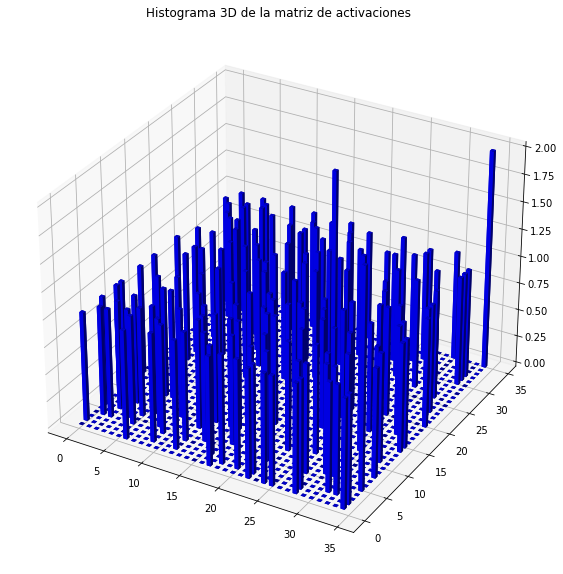

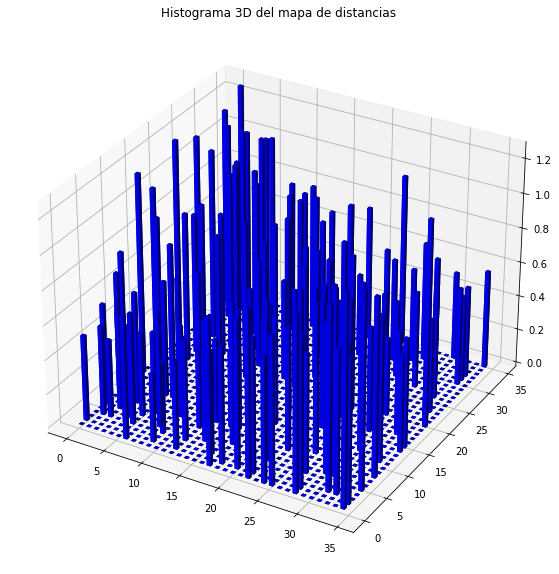

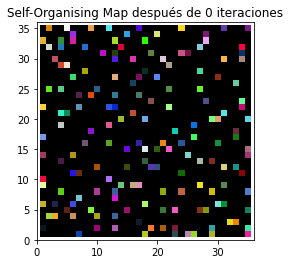

In [15]:
# Clasifica los patrones de entrenamiento con la matriz de pesos recién entrenada
clasificarDatos(datos, datosFull["CountryName"])

## Graficas rendimiento

In [16]:

'''
   Crea una gráfica para los datos resultantes de lado mapa, learning rate y periodo
   Entradas: titulo, label eje x, eje x (lado mapa, learning rate y periodo), eje y1 error.cuantificacion, eje y2 error.topologógico, eje y3 num.clases
   Salidas:  gráfica rendimiento
'''

def plot_graph(title, xlabel, x, y1, y2, y3):
    #Crea una figura y un conjunto de ejes
    fig, ax = plt.subplots()
    #Etiquetas para los ejes
    ylabel1 = 'Valores error (morado topológico y verde cuantificación)'
    ylabel2 = 'Clases (rojo)'
    #Colores de las líneas de la gráfica
    color1 = 'tab:purple'
    color2 = 'tab:green'
    color3 = 'tab:red'
    #tipos de símbolos para cada línea de la grafica
    marker1 = '^'
    marker2 = 'o'
    marker3 = '*'
    #labels para las diferentes lineas de las gráficas
    label1 = 'E. Cuanti.'
    label2 = 'E. Topo.'
    label3 = 'Clases'
    #Añade cada línea a la gráfica
    ax.plot(x, y1, marker=marker1, color=color1, label=label1)
    ax.plot(x, y2, marker=marker2, color=color2, label=label2)
    #Establece la etiqueta del eje 'y' para el primer conjunto de datos
    ax.set_ylabel(ylabel1)
    
    #Crea un segundo conjunto de ejes y añade la tercera línea de datos
    ax2 = ax.twinx()
    ax2.plot(x, y3, marker=marker3, color=color3, label=label3)
    #Establece la etiqueta del eje 'y' para el segundo conjunto de datos
    ax2.set_ylabel(ylabel2)

    #Establece los valores que se muestran en el eje y
    plt.yticks(range(0, 120, 10))
    #Establece el título de la gráfica y estilo
    ax.set_title(title, loc="center", fontdict={'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
    #Establece la etiqueta del eje x
    ax.set_xlabel(xlabel)

    #Muestra una línea de cuadrícula horizontal
    ax.grid(axis='y', color='gray', linestyle='dashed')
    
    #Muestra las leyendas de las líneas de datos
    ax.legend()
    ax2.legend()

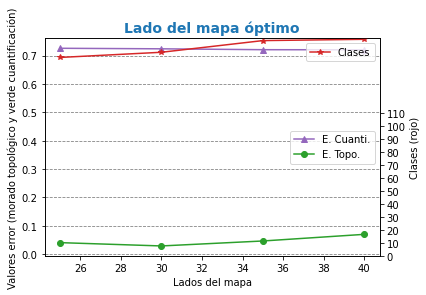

In [24]:
# Gráfica del cálculo del lado de mapa óptimo mediante los datos de las tabla recogida:
# Datos de muestra
lados_mapa = [25,30,35,40]
errs_cuant = [0.7260,0.7241,0.7210,0.7206]
errs_top = [0.0409,0.0292,0.0467,0.0701]
num_clases = [153,157,166,167]

title = 'Lado del mapa óptimo'
xlabel = 'Lados del mapa'

plot_graph(title, xlabel, lados_mapa, errs_cuant, errs_top, num_clases)
plt.show()

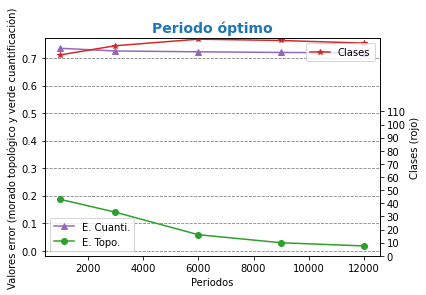

In [25]:
# Gráfica del cálculo del periodo óptimo mediante los datos de las tabla recogida:
# Datos de muestra
periodo= [1000,3000,6000,9000,12000]
errs_cuant = [0.7357,0.7259,0.7229,0.7205,0.7193]
errs_top = [0.1871,0.1403,0.0584,0.0291,0.0175]
num_clases = [153,160,165,164,162]


title = 'Periodo óptimo'
xlabel = 'Periodos'

plot_graph(title, xlabel, periodo, errs_cuant, errs_top, num_clases)
plt.show()

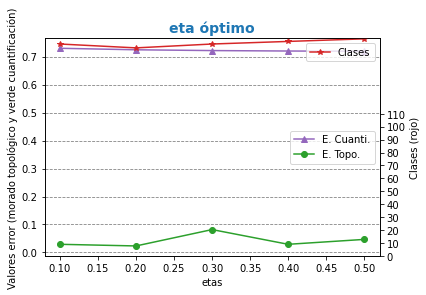

In [27]:
# Gráfica del cálculo del eta óptimo mediante los datos de las tabla recogida:
# Datos de muestra
etas = [0.1,0.2,0.3,0.4,0.5]
errs_cuant = [0.7298,0.7244,0.7216,0.7200,0.7191]
errs_top = [0.0292,0.0233,0.0818,0.0292,0.0467]
num_clases = [164,161,164,166,168]


title = 'eta óptimo'
xlabel = 'etas'

plot_graph(title, xlabel, etas, errs_cuant, errs_top, num_clases)
plt.show()

## SOM Prueba

In [18]:
# Se crea la matriz correspondientVenezuela, RBe al Dataset
datosFull = pd.read_csv('Countries2010.csv')
datos = datosFull.drop("CountryName", axis=1)
datosprueba = datosFull[['GDP per capita (current US$)','Mortality rate, neonatal (per 1,000 live births)']]
datosprueba = (datosprueba - datosprueba.min()) / (datosprueba.max() - datosprueba.min())
datosprueba.tail(10)

,GDP per capita (current US$),"Mortality rate, neonatal (per 1,000 live births)"
161,0.467330,0.061350
162,0.113767,0.102249
163,0.011284,0.449898
164,0.026700,0.224949
165,0.129711,0.184049
166,0.010862,0.239264
167,0.020615,0.251534
168,0.010634,0.517382
169,0.012051,0.488753
170,0.004464,0.494888


In [19]:
paises_interesantes = ["Venezuela, RB","Norway", "Ethiopia"]
datos_submuestreados = datos[datosFull["CountryName"].isin(paises_interesantes)]

datos_submuestreados = (datos_submuestreados - datos_submuestreados.min()) / (
    datos_submuestreados.max() - datos_submuestreados.min())

display(datos_submuestreados) 


,"Adolescent fertility rate (births per 1,000 women ages 15-19)",GDP per capita (current US$),GNI (current US$),"Incidence of tuberculosis (per 100,000 people)",Improved water source (% of population with access),"Mortality rate, neonatal (per 1,000 live births)","Mortality rate, under-5 (per 1,000)","Mortality rate, infant (per 1,000 live births)","Population, ages 0-14 (% of total)",Population ages 65 and above (% of total),"Tuberculosis case detection rate (%, all forms)",Urban population (% of total),Rural population (% of total population),Mobile cellular subscriptions (per 100 people),Internet users (per 100 people),"GNI per capita, PPP (current international $)","Inflation, GDP deflator (annual %)"
49,0.894376,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
114,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.75,0.864703,0.135297,1.000000,1.000000,1.000000,0.101551
165,1.000000,0.151647,0.886914,0.071017,0.860153,0.267974,0.184828,0.242739,0.423967,0.187959,1.00,1.000000,0.000000,0.826647,0.395294,0.255698,1.000000


Coordenadas de la BMU para el patron 1: [34, 6]

Coordenadas de la BMU para el patron 2: [1, 25]

Coordenadas de la BMU para el patron 3: [7, 0]

Mapa clasificacion:
 [[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0

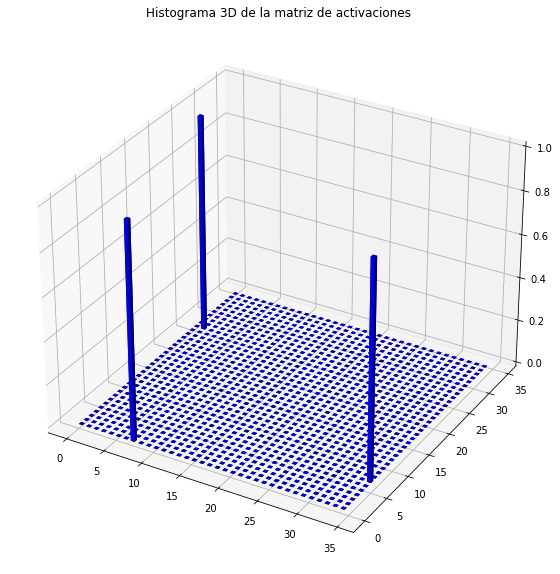

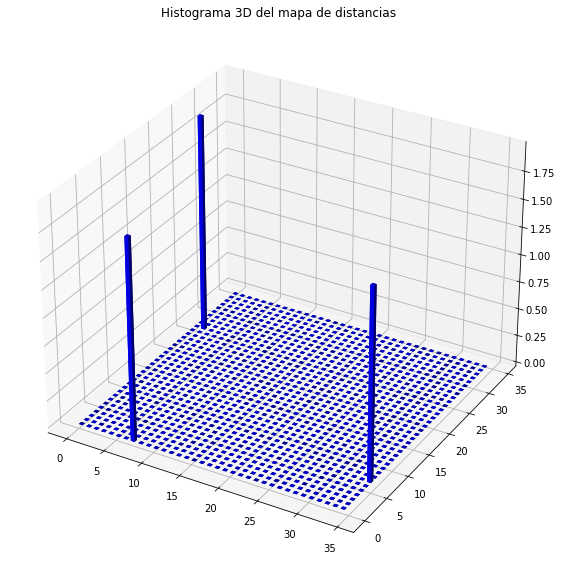

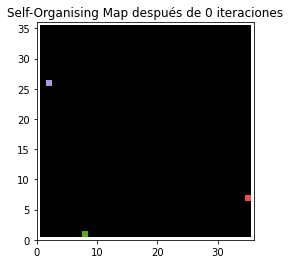

In [20]:
clasificarDatos(datos_submuestreados, paises_interesantes)

In [21]:
datosFull = pd.read_csv('Countries2010.csv')
datos = datosFull.drop("CountryName", axis=1)

In [22]:
paises_interesantes2 = ["Haiti", "Ethiopia",'Yemen, Rep.','Bangladesh','Nepal', 'United States','Japan','Germany','United Kingdom','Canada']
datos_submuestreados2 = datos[datosFull["CountryName"].isin(paises_interesantes2)]

datos_submuestreados2 = (datos_submuestreados2 - datos_submuestreados2.min()) / (
    datos_submuestreados2.max() - datos_submuestreados2.min())

display(datos_submuestreados2) 

,"Adolescent fertility rate (births per 1,000 women ages 15-19)",GDP per capita (current US$),GNI (current US$),"Incidence of tuberculosis (per 100,000 people)",Improved water source (% of population with access),"Mortality rate, neonatal (per 1,000 live births)","Mortality rate, under-5 (per 1,000)","Mortality rate, infant (per 1,000 live births)","Population, ages 0-14 (% of total)",Population ages 65 and above (% of total),"Tuberculosis case detection rate (%, all forms)",Urban population (% of total),Rural population (% of total population),Mobile cellular subscriptions (per 100 people),Internet users (per 100 people),"GNI per capita, PPP (current international $)","Inflation, GDP deflator (annual %)"
10,1.000000,0.008712,0.007805,0.836998,0.683908,0.885350,0.225681,0.442840,0.604706,0.105837,0.000000,0.185075,0.814925,0.320293,0.035015,0.032406,0.537744
27,0.090675,0.981046,0.104275,0.003412,0.996169,0.082803,0.011673,0.030084,0.102158,0.569504,0.750000,0.869946,0.130054,0.585772,0.944214,0.799289,0.277923
49,0.821853,0.000000,0.001534,1.000000,0.000000,1.000000,0.352626,0.582431,1.000000,0.038030,0.477273,0.006744,0.993256,0.000000,0.000000,0.000000,0.208476
56,0.047133,0.862883,0.230109,0.006065,1.000000,0.038217,0.004864,0.013237,0.007433,0.885521,0.931818,0.779769,0.220231,0.851914,0.964392,0.822496,0.168798
64,0.459741,0.006671,0.000000,0.852161,0.220307,0.917197,1.000000,1.000000,0.725260,0.094618,0.386364,0.477531,0.522469,0.281188,0.090445,0.008990,0.439912
76,0.000000,0.886226,0.372923,0.059894,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.768323,0.919407,0.702488,0.000000
108,0.927069,0.005279,0.000627,0.601971,0.750958,0.815287,0.205253,0.407942,0.766648,0.119811,0.795455,0.000000,1.000000,0.227923,0.085223,0.019235,1.000000
160,0.194813,0.790116,0.160645,0.040940,1.000000,0.060510,0.009728,0.024067,0.141424,0.668547,0.909091,0.874898,0.125102,1.000000,1.000000,0.737403,0.304758
161,0.347045,1.000000,1.000000,0.000000,0.982759,0.095541,0.020428,0.046931,0.207486,0.513646,0.931818,0.867707,0.132293,0.720845,0.842018,1.000000,0.195581
168,0.782434,0.020157,0.001492,0.181198,0.130268,0.805732,0.248054,0.481348,0.934865,0.000000,0.636364,0.202307,0.797693,0.352707,0.137685,0.062722,0.921509


Coordenadas de la BMU para el patron 1: [25, 14]

Coordenadas de la BMU para el patron 2: [0, 33]

Coordenadas de la BMU para el patron 3: [34, 12]

Coordenadas de la BMU para el patron 4: [0, 31]

Coordenadas de la BMU para el patron 5: [31, 0]

Coordenadas de la BMU para el patron 6: [0, 29]

Coordenadas de la BMU para el patron 7: [27, 14]

Coordenadas de la BMU para el patron 8: [2, 33]

Coordenadas de la BMU para el patron 9: [0, 24]

Coordenadas de la BMU para el patron 10: [34, 1]

Mapa clasificacion:
 [[[0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  ...
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.09067456 0.98104552 0.10427488 ... 0.94421365 0.79928915 0.27792349]
  [0.         0.         0.         ... 0.         0.         0.        ]]

 [[0.         0.         0.      

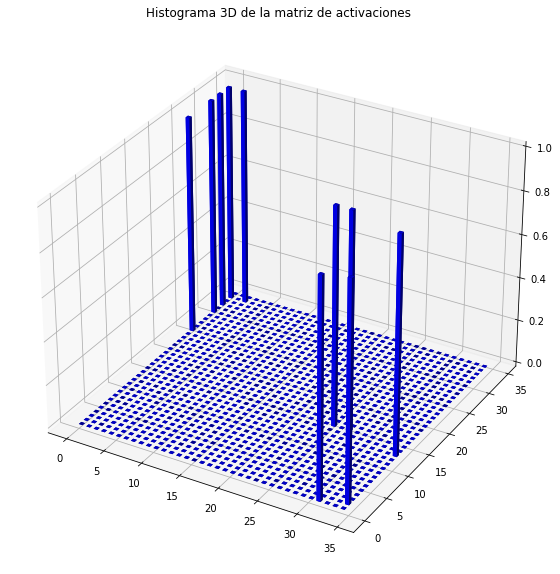

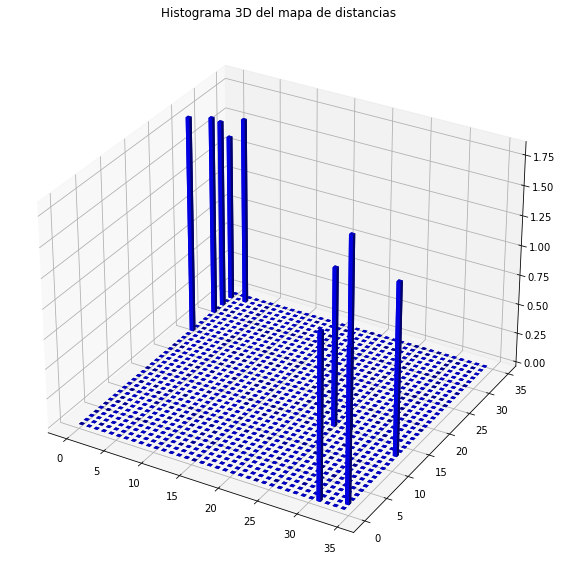

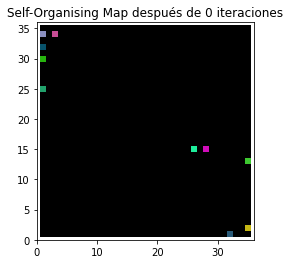

In [23]:
clasificarDatos(datos_submuestreados2, paises_interesantes2)